## Gráfico de Barras con Líneas
Vamos a combinar un gráfico de barras con un gráfico de líneas.

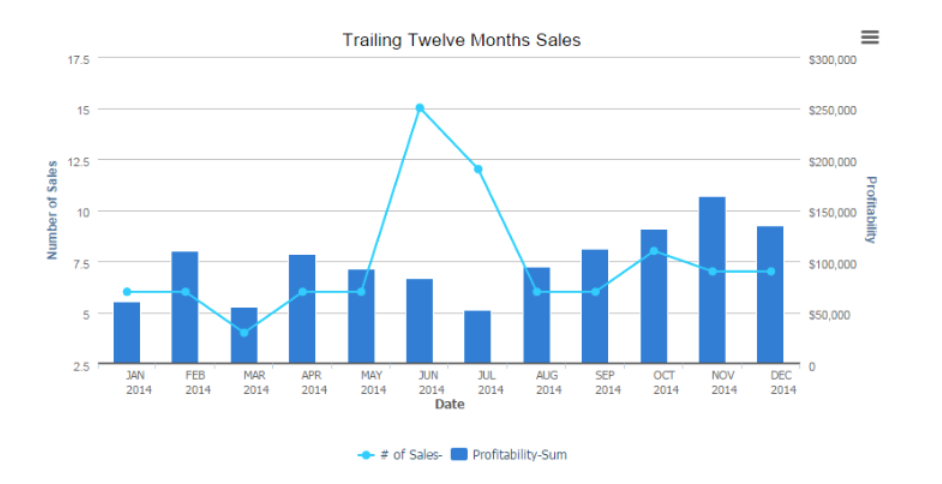

#### Cuando utilizar
- Cuando quiero comparar cambios de magnitudes de una variable a través del tiempo y añadir una segunda variable como un gráfico de líneas que tenga una escala diferente.

#### Consejos
- Los mismos consejos que el gráfico de barras y de líneas.
- Como consejo general, no recomiendo añadir más de dos líneas al gráfico. Se volvería muy complejo de leer.

### En esta clase

#### Datos
Información sobre países por año: Expectativa de vida, Población y GDP per Cápita.

#### Objetivos
1. Comparar la expectativa de vida promedio en África a lo largo de los años y al mismo tiempo ver como ha cambiado el GDP per Cápita.

### Referencias
- https://github.com/lkuffo/data-viz/blob/main/NIVEL2/8_barras_y_lineas.ipynb

In [1]:
import pandas as pd

In [2]:
# Leemos los datos con Pandas y filtramos por continente
df = pd.read_csv('../data/paises_vida.csv', index_col='index')
df = df.dropna()
df = df[df['continent'] == 'Africa']
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
index,,,,,,,,
24,Algeria,Africa,1952,43.077,9279525,2449.008185,DZA,12
25,Algeria,Africa,1957,45.685,10270856,3013.976023,DZA,12
26,Algeria,Africa,1962,48.303,11000948,2550.816880,DZA,12
27,Algeria,Africa,1967,51.407,12760499,3246.991771,DZA,12
28,Algeria,Africa,1972,54.518,14760787,4182.663766,DZA,12
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716


In [8]:
df_agrupado = df.groupby('year').agg({
    'lifeExp': 'mean',
    'pop': 'sum',
    'gdpPercap': 'mean'
})
df_agrupado = df_agrupado.reset_index() # Para que las gráficas inicien de cero
df_agrupado

,year,lifeExp,pop,gdpPercap
0,1952,39.135500,237640501,1252.572466
1,1957,41.266346,264837738,1385.236062
2,1962,43.319442,296516865,1598.078825
3,1967,45.334538,335289489,2050.363801
4,1972,47.450942,379879541,2339.615674
5,1977,49.580423,433061021,2585.938508
6,1982,51.592865,499348587,2481.592960
7,1987,53.344788,574834110,2282.668991
8,1992,53.629577,659081517,2281.810333
9,1997,53.598269,743832984,2378.759555


In [4]:
import seaborn as sns

<Axes: xlabel='year', ylabel='lifeExp'>

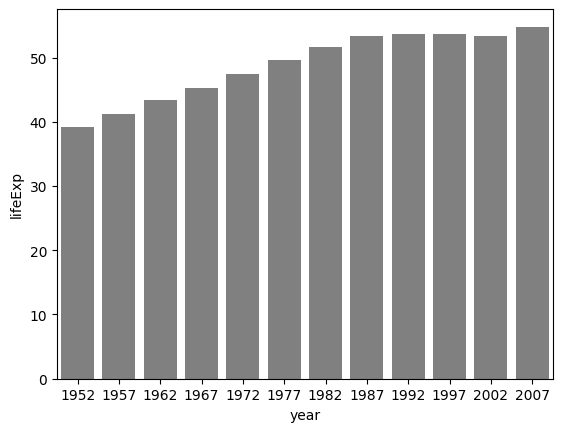

In [5]:
sns.barplot(
    data=df_agrupado,
    x='year',
    y='lifeExp',
    color='gray'
)

In [6]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'GDP Per Cápita')

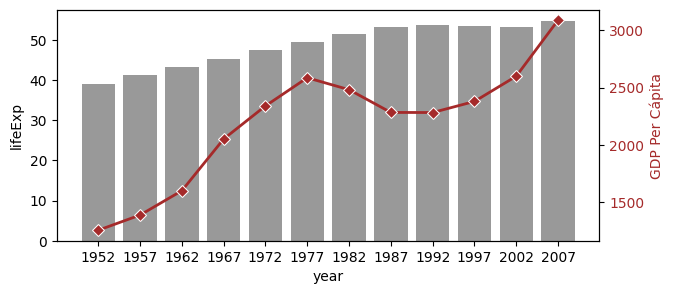

In [7]:
fig, ax1 = plt.subplots(
    figsize=(7, 3)
)

sns.barplot(
    data=df_agrupado,
    x='year',
    y='lifeExp',
    color='gray',
    ax=ax1,
    alpha=0.8
)

ax2 = ax1.twinx()

sns.lineplot(
    data=df_agrupado['gdpPercap'],
    ax=ax2,
    color='brown',
    linewidth=2,
    marker='D'
)

ax2.tick_params(axis='y', labelcolor='brown')
ax2.set_ylabel('GDP Per Cápita', color='brown')